In [1]:
# Build a custom loss function

This project was a part of **Machine Learning Specialization with TF2** by [**CLOUDXLAB**](http://cloudxlab.com/).

import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data,
         housing.target.reshape(-1, 1), random_state=42)

X_train, X_valid, y_train, y_valid =  train_test_split( X_train_full, 
        y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_valid_scaled = scaler.transform(X_valid)

In [9]:
X_test_scaled = scaler.transform(X_test)

Defining a Custom Loss Function - Huber Loss
Let's implement huber loss. Huber loss is less sensitive to outliers in data than mean squared error.

Below is the formula of huber loss.

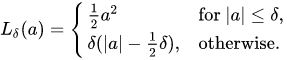

**Note:**

- Huber loss is defined as:

    - error **2 / 2, if error < delta (ie, if it is a small error)

    - delta * ( |error| - delta/2), otherwise ( |error| means the absolute value error)

In this exercise, we consider delta=1.

Thus, the **huber_fn** is defined as:
    
    - error**2/2, if error < 1 (ie, if it is a small error).
    - |error| - 0.5, otherwise

- tf.abs(x) returns the positive value(absolute value) of x.

- tf.square(x) returns the squared value of x.

- tf.where(bool_array, x, y) returns the elements where condition is True in bool_array (multiplexing x and y).

In simpler terms, tf.where will choose an output shape from the shapes of condition, x, and y that all three shapes are broadcastable to.

The condition tensor acts as a mask that chooses whether the corresponding element/row in the output should be taken from x (if the element in the condition is True) or from y (if it is False).

For example, upon executing the following,

tf.where([True, False, False, True], [1,2,3,4], [100,200,300,400])

the output would be : <tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 200, 300, 4], dtype=int32)>

In [27]:
  def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < 1
        squared_loss = tf.square(error) / 2
        linear_loss  = tf.abs(error) - 0.5
        return tf.where(is_small_error, squared_loss, linear_loss)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", 
       kernel_initializer="lecun_normal", 
       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [31]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [34]:
model.fit(X_train_scaled,y_train, epochs=15,
  validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/15
11610/11610 [==============================] - 1s 119us/sample - loss: 0.5935 - mae: 0.9491 - val_loss: 0.2426 - val_mae: 0.5450
Epoch 2/15
11610/11610 [==============================] - 1s 58us/sample - loss: 0.2168 - mae: 0.5173 - val_loss: 0.2072 - val_mae: 0.4940
Epoch 3/15
11610/11610 [==============================] - 1s 57us/sample - loss: 0.2066 - mae: 0.5006 - val_loss: 0.1906 - val_mae: 0.4761
Epoch 4/15
11610/11610 [==============================] - 1s 57us/sample - loss: 0.2013 - mae: 0.4925 - val_loss: 0.1891 - val_mae: 0.4690
Epoch 5/15
11610/11610 [==============================] - 1s 58us/sample - loss: 0.1972 - mae: 0.4858 - val_loss: 0.1792 - val_mae: 0.4599
Epoch 6/15
11610/11610 [==============================] - 1s 57us/sample - loss: 0.1935 - mae: 0.4801 - val_loss: 0.1769 - val_mae: 0.4548
Epoch 7/15
11610/11610 [==============================] - 1s 57us/sample - loss: 0.1912 - mae: 0.4757 - val_loss: 0.

In [35]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 29us/sample - loss: 0.1744 - mae: 0.4508


[0.1743710722110068, 0.45079333]

Observe the values of loss and mae. These values are nearly the same as those of the train and validation datasets. Also, the values are low. Hence our model hasn't been overfitted and is giving a decent performance.